## Preambule

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

C:\Users\dekkerm\AppData\Local\Temp\2\ipykernel_10344\3550119306.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Read data

In [2]:
xr_dataread = xr.open_dataset("K:/ECEMF/T5.2/xr_dataread.nc")
xr_nld_raw = xr.open_dataset("K:/ECEMF/T5.2/Allocations/xr_alloc_NLD.nc")

In [32]:
rules = ['GF', 'PCC', 'PC', 'AP', 'ECPC', 'GDR']
#rulecolors = np.array([(121, 125, 28), 'forestgreen', 'goldenrod', 'mediumvioletred', 'tomato', 'steelblue'])/256
rulecolors = np.array([(90, 51, 36), (141, 145, 31), (0, 156, 223), (157, 0, 100), (230, 173, 31), (61, 29, 92), ])/256
rulenames = [r"Continuity ($\it{Grandfathering}$)",
             r"Continuity & Equality ($\it{Per}$ $\it{capita}$ $\it{convergence}$)",
             r"Equality ($\it{Immediate}$ $\it{per}$ $\it{capita}$)",
             r"Capability ($\it{Ability}$ $\it{to}$ $\it{pay}$)",
             r"Equality & Responsibility ($\it{Equal}$ $\it{cumulative}$ $\it{per}$ $\it{capita}$)",
             r"Capability & Responsibility ($\it{Greenhouse}$ $\it{Development}$ $\it{Rights}$)"]

In [4]:
emis_1990 = xr_dataread.GHG_hist.sel(Region='NLD', Time=1990)

## Plot

In [5]:
dt = 0.5
xr_nld_post = xr_nld_raw.sel(Time=np.arange(2040, 2101))
xr_nld = xr_nld_raw.sel(Time=np.arange(2021, 2041))

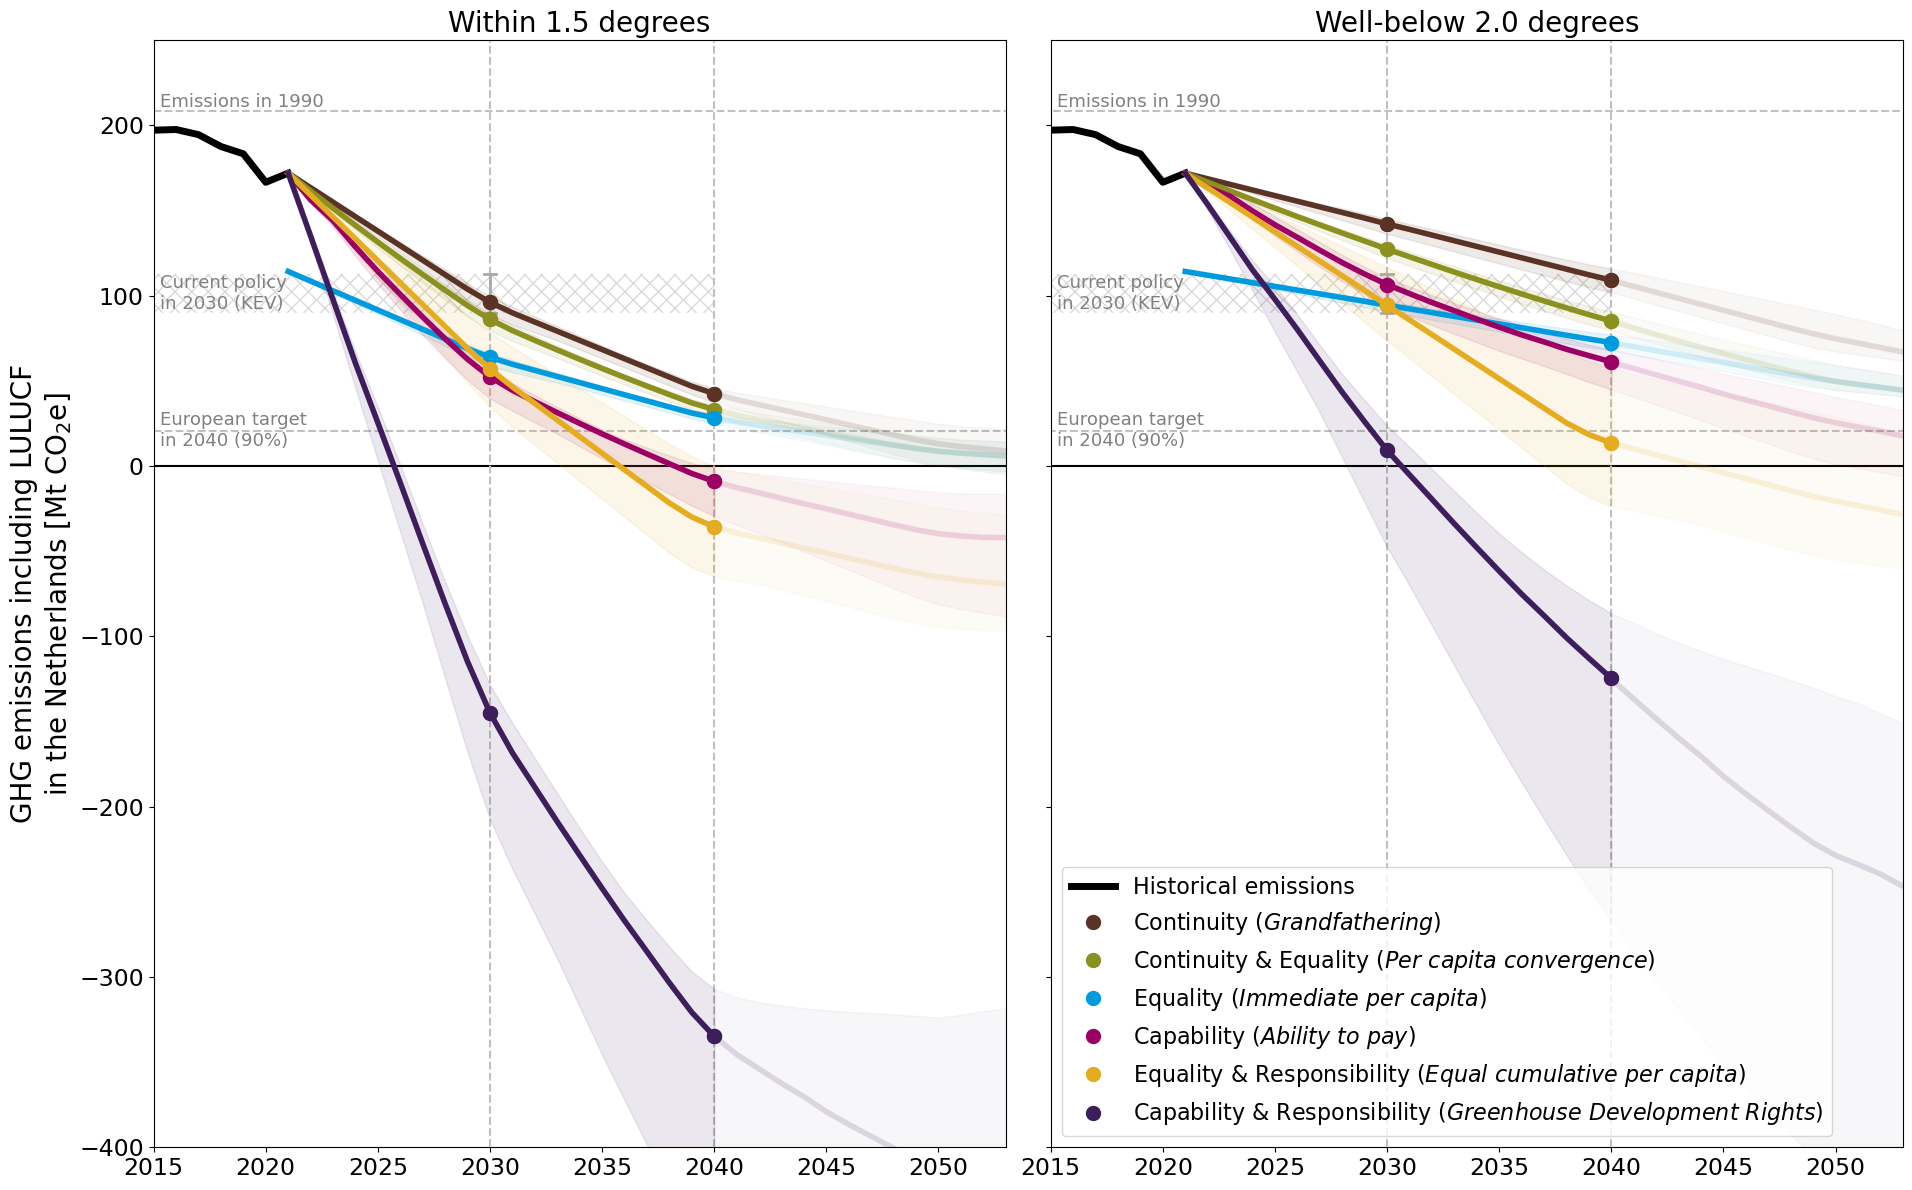

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12), facecolor='w', sharey=True)
for ax_i, ax in enumerate([ax1, ax2]):
    temp=[1.5, 2.0][ax_i]
    risk=[0.5, 0.33][ax_i]
    basic_settings = {'Temperature': temp, 'Risk': risk, 'NegEmis': 0.5, 'NonCO2red': 0.5, 'Scenario':'SSP2', 'Convergence_year':2050, 'Discount_factor':2.0, 'Historical_startyear':1950}
    ax.set_xlim([2015, 2053])
    ax.set_ylim([-400, 250])

    ax.plot(xr_dataread.Time, xr_dataread.GHG_hist.sel(Region='NLD'), lw=5, c='k', label='Historical emissions')
    ax.plot([1990, 1e5], [xr_dataread.GHG_hist.sel(Region='NLD', Time=1990), xr_dataread.GHG_hist.sel(Region='NLD', Time=1990)], '--', c='silver', zorder=-1e9)

    for rule_i, rule in enumerate(rules):
        dat = xr_nld.sel(**basic_settings, Timing='Immediate')[rule]
        ax.plot(xr_nld.Time, dat, lw=4, c=rulecolors[rule_i])
        ax.plot(xr_nld_post.Time, xr_nld_post.sel(**basic_settings)[rule].mean(dim='Timing'), lw=4, c=rulecolors[rule_i], alpha=0.15)
        y1 = xr_nld.sel({'Temperature': temp, 'Risk': risk, 'Convergence_year':2050, 'Timing': 'Immediate'}).max(dim=['Scenario', 'NonCO2red', 'NegEmis', 'Discount_factor', 'Historical_startyear'], skipna=False)[rule]
        y2 = xr_nld.sel({'Temperature': temp, 'Risk': risk, 'Convergence_year':2050, 'Timing': 'Immediate'}).min(dim=['Scenario', 'NonCO2red', 'NegEmis', 'Discount_factor', 'Historical_startyear'], skipna=False)[rule]
        ax.fill_between(xr_nld.Time, y1, y2, where=y1>=y2, color=rulecolors[rule_i], alpha=0.10)
        y1 = xr_nld_post.sel({'Temperature': temp, 'Risk': risk, 'Convergence_year':2050, 'Timing': 'Immediate'}).max(dim=['Scenario', 'NonCO2red', 'NegEmis', 'Discount_factor', 'Historical_startyear'], skipna=False)[rule]
        y2 = xr_nld_post.sel({'Temperature': temp, 'Risk': risk, 'Convergence_year':2050, 'Timing': 'Immediate'}).min(dim=['Scenario', 'NonCO2red', 'NegEmis', 'Discount_factor', 'Historical_startyear'], skipna=False)[rule]
        ax.fill_between(xr_nld_post.Time, y1, y2, where=y1>=y2, color=rulecolors[rule_i], alpha=0.04)
        bbox = dict(boxstyle="round", fc='white', ec=rulecolors[rule_i])
        y1 = xr_nld.sel({'Temperature': temp, 'Risk': risk, 'Convergence_year':2050, 'Timing': 'Immediate'}).max(dim=['Scenario', 'NonCO2red', 'NegEmis', 'Discount_factor', 'Historical_startyear'], skipna=False)[rule]
        y2 = xr_nld.sel({'Temperature': temp, 'Risk': risk, 'Convergence_year':2050, 'Timing': 'Immediate'}).min(dim=['Scenario', 'NonCO2red', 'NegEmis', 'Discount_factor', 'Historical_startyear'], skipna=False)[rule]
        for year_i, year in enumerate([2030, 2040]):
            val = dat.sel(Time=year)
            valmn = y2.sel(Time=year)
            valmx = y1.sel(Time=year)
            if temp == 1.5: val_plot = val+[[18, 11, 9, -25, -5, 0][rule_i], [15, 5, -10, 0, 0, 0][rule_i]][year_i]
            if temp == 2.0: val_plot = val+[[5, 0, 0, 3, -15, 0][rule_i], [0, 5, 0, -10, 0, 0][rule_i]][year_i]
            if year == 2030: ax.plot([year, year], [val, val], 'o', lw=5, ms=10, label=rulenames[rule_i], c=rulecolors[rule_i])
            else: ax.plot([year, year], [val, val], 'o', lw=5, ms=10, c=rulecolors[rule_i])
            #ax.text(year+dt*3, val_plot, str(np.round(-float((valmx-emis_1990)/emis_1990)*100,1))+' - '+str(np.round(-float((valmn-emis_1990)/emis_1990)*100,1))+'%', fontsize=18, va='center', ha='left') #bbox=bbox, 
            # ax.plot([year+dt*3, year], [val_plot, val], lw=0.5, c=rulecolors[rule_i])
            # ax.plot([year+dt*3], [val_plot], 'o', c=rulecolors[rule_i])
            #if year == 2040: ax.text(year+4, val_plot, rulenames[rule_i], fontsize=18, va='center', ha='left', c=rulecolors[rule_i])

    # Policy stuff
    x = np.linspace(-1e3, 2040, 10)
    y1 = np.array([emis_1990*(1-0.46)]*len(x))
    y2 = np.array([emis_1990*(1-0.57)]*len(x))
    ax.fill_between(x, y1, y2, where=y1>=y2, alpha=0.15, zorder=-1e9, color="none", hatch="xx", edgecolor="k", lw=0)
    # y1 = np.array([emis_1990*(1-0.90)]*len(x))
    # y2 = np.array([emis_1990*(1-0.95)]*len(x))
    # ax.fill_between(x, y1, y2, where=y1>=y2, alpha=0.15, zorder=-1e9, color="none", hatch="xx", edgecolor="k", lw=0)

    ax.plot([-1e3, 1e5], [0, 0], 'k', zorder=-1e9)
    ax.plot([2030, 2030], [-1e3, 1e3], '--', c='silver', zorder=-1e9)
    ax.plot([2040, 2040], [-1e3, 1e3], '--', c='silver', zorder=-1e9)
    ax.plot([-1e3, 1e5], [emis_1990*(1-0.90), emis_1990*(1-0.90)], '--', c='silver', zorder=-1e9)

    dt=0.25
    ax.plot([2030, 2030], [emis_1990*(1-0.57), emis_1990*(1-0.46)], 'darkgrey', lw=2, zorder=-1)
    ax.plot([2030-dt, 2030+dt], [emis_1990*(1-0.46), emis_1990*(1-0.46)], 'darkgrey', lw=2, zorder=-1)
    ax.plot([2030-dt, 2030+dt], [emis_1990*(1-0.57), emis_1990*(1-0.57)], 'darkgrey', lw=2, zorder=-1)
    #ax.plot([2030, 2030], [emis_1990*(1-0.57), emis_1990*(1-0.46)], 'ks', ms=10)

    # ax.plot([2040, 2040], [emis_1990*(1-0.90), emis_1990*(1-0.95)], 'darkgrey', lw=2, zorder=-1)
    # ax.plot([2040-dt, 2040+dt], [emis_1990*(1-0.90), emis_1990*(1-0.90)], 'darkgrey', lw=2, zorder=-1)
    # ax.plot([2040-dt, 2040+dt], [emis_1990*(1-0.95), emis_1990*(1-0.95)], 'darkgrey', lw=2, zorder=-1)
    #ax.plot([2040, 2040], [emis_1990*(1-0.90), emis_1990*(1-0.95)], 'ks', ms=10)

    ax.text(2015.3, emis_1990, 'Emissions in 1990', color='grey', va='bottom', ha='left', fontsize=13)
    ax.text(2015.3, emis_1990*(1-np.mean([0.46, 0.57])), 'Current policy\nin 2030 (KEV)', color='grey', va='center', ha='left', fontsize=13)
    ax.text(2015.3, emis_1990*(1-np.mean([0.90, 0.90])), 'European target\nin 2040 (90%)', color='grey', va='center', ha='left', fontsize=13)
    #ax.text(2030.3, 160, 'Reduction targets:', va='bottom', ha='left', fontsize=18)

    ax.xaxis.set_tick_params(labelsize=17)
    ax.yaxis.set_tick_params(labelsize=17)
    ax.set_title(['Within 1.5 degrees', 'Well-below 2.0 degrees'][ax_i], fontsize=20)
ax2.legend(loc='lower left', fontsize=16)
ax1.set_ylabel('GHG emissions including LULUCF\nin the Netherlands [Mt CO$_2$e]', fontsize=20)
fig.tight_layout()
plt.savefig("X:/user/dekkerm/Projects/EffortSharing/Figures/PBL_report/Fig_NLD_nonumbers.png", dpi=250)